# Notebook #3: Gestión de Outliers

In [22]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../../../")
from src import soporte_preprocesamiento as sp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- Importamos el dataframe generado en el notebook anterior.

In [23]:
df = pd.read_pickle('../../../../datos/cluster0/modelo1/df_encoded.pkl')
df.head()

,Profit,Ship Mode,Country,Market,Region,Category,Sub-Category,Quantity,Discount,Order Priority
0,762.1845,39.642779,30.854121,30.854121,25.856881,55.868216,41.652012,7,0.0,30.524541
1,-288.7650,37.882985,49.866027,56.443719,44.789167,32.942193,41.093914,9,0.1,30.524541
2,311.5200,39.642779,67.711866,32.792245,32.792245,55.868216,89.905757,8,0.0,30.524541
3,763.2750,37.882985,49.866027,56.443719,44.789167,55.868216,52.426690,5,0.1,30.524541
4,564.8400,36.787755,25.592859,56.443719,44.789167,32.942193,41.093914,4,0.0,30.524541


- Transformamos temporalmente las columnas que deben ser categóricas pero durante el encoding se han convertido en numéricas.

In [24]:
df[['Ship Mode', 'Country', 'Market', 'Region', 'Category', 'Sub-Category', 'Order Priority']] = df[['Ship Mode', 'Country', 'Market', 'Region', 'Category', 'Sub-Category', 'Order Priority']].astype(str)

- Como hemos detectado en el EDA, tenemos outliers en las tres features numéricas. Los de Quantity y Discount, se encuentran dentro de los valores normales (lo vemos en la escala), y en el caso de Profit, surgen de la variabilidad propia que puede tener una categoría como esta. Lo vemos en los box plots:

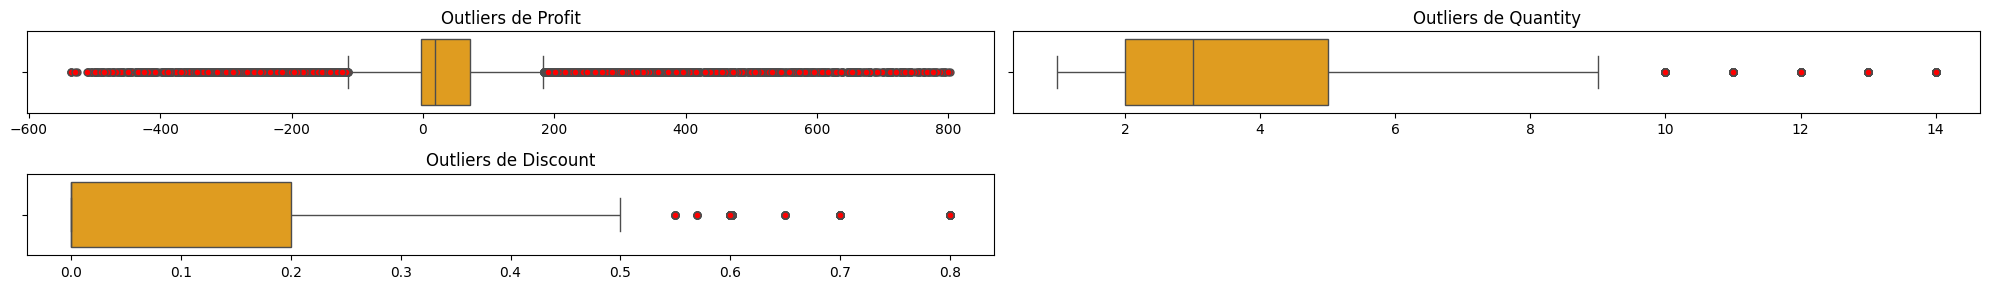

In [25]:
sp.detectar_outliers(df, tamano_grafica=(20,3))

- Para verlos numéricamente, vamos a recurrir al método IFO.

In [26]:
df = sp.outliers_isolation_forest(df)

- Filtramos aquellos para los cuáles en el 70% de las combinacines, son outliers. Sabiendo que representan un 1,4% del conjunto original, los vamos a eliminar.

In [27]:
df, df_filtrado = sp.filtrar_outliers(df, 0.7, drop_indices=True)
df.reset_index(inplace=True, drop=True)

Se han filtrado 251 filas, que representan un 1.39% del dataframe original.


,Profit,Ship Mode,Country,Market,Region,Category,Sub-Category,Quantity,Discount,Order Priority,outliers_ifo_0.01_50,outliers_ifo_0.01_100,outliers_ifo_0.01_200,outliers_ifo_0.05_50,outliers_ifo_0.05_100,outliers_ifo_0.05_200,outliers_ifo_0.1_50,outliers_ifo_0.1_100,outliers_ifo_0.1_200
0,762.1845,39.64277935973041,30.85412115438498,30.85412115438498,25.856881243926143,55.86821605918619,41.652012319422155,7,0.00,30.524540570542634,1,-1,1,-1,-1,-1,-1,-1,-1
3,763.2750,37.882985008863,49.86602719854941,56.443718752974775,44.78916727538349,55.86821605918619,52.42669001495886,5,0.10,30.524540570542634,-1,1,1,-1,-1,-1,-1,-1,-1
13,526.4960,36.7877545267746,90.57587985847107,32.22489629515757,40.43031163500133,32.94219345675881,-19.819527429467087,8,0.20,30.524540570542634,-1,1,1,-1,-1,-1,-1,-1,-1
17,763.1550,36.7877545267746,52.25578428093645,55.5021357615894,40.43031163500133,55.86821605918619,42.485023549488055,9,0.15,30.524540570542634,-1,-1,-1,-1,-1,-1,-1,-1,-1
25,720.7500,39.64277935973041,52.25578428093645,55.5021357615894,40.43031163500133,32.94219345675881,41.093914463566456,5,0.10,30.524540570542634,-1,1,1,-1,-1,-1,-1,-1,-1


Se han eliminado 251 filas (1.0%) del dataframe original.


- Y nuevamente con la ayuda de los boxplots, vemos que, nuestras features ahora se encuentran más libres de outliers.

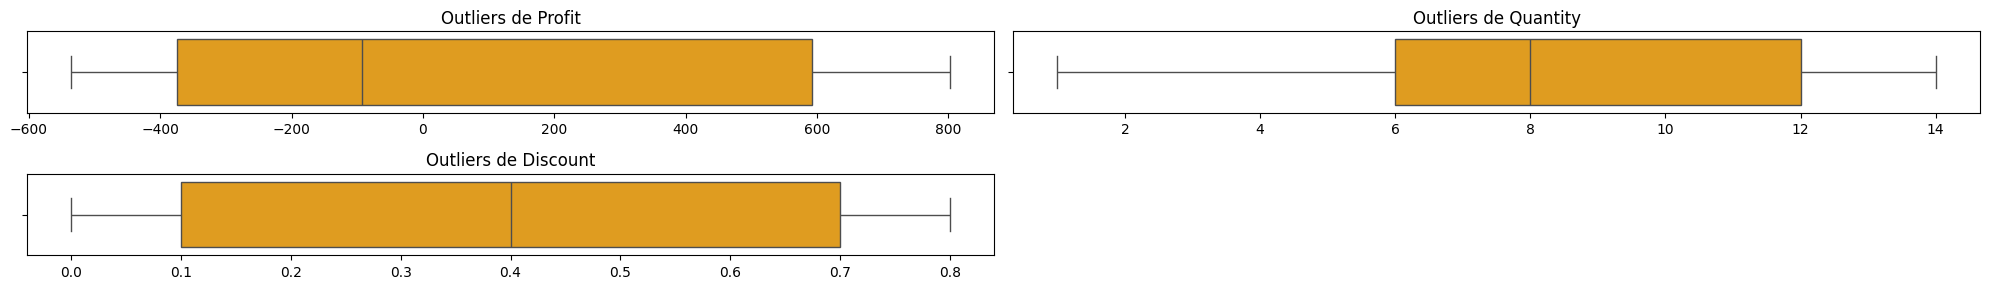

In [28]:
sp.detectar_outliers(df_filtrado, tamano_grafica=(20,3))

- Como último paso, guardamos el DF para llevarlo al siguiente paso: la estandarización.

In [31]:
with open('../../../../datos/cluster0/modelo1/df_sinoutliers.pkl', 'wb') as f:
    pickle.dump(df, f)